# Warm-up excercise 5

Now that you have seen how to conduct basic analyses and to visualise data, it's time for you to combine apply this knowledge. To prepare for the workshop, we ask you to complete two warm-up excercises.


Some important notes for the excercises:

* These excercises are a warming up meant to help you get ready for the meeting. Make sure to give them a try on all of them. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next excercise.
* As these excercises are meant to help you participate in the workshop and us to make sure you can get as much as possible from the meetings, we do not expect perfect answers. However, this is important to show the effort you have put in the excercises and what obstacles you faced.

For this excercice, we will use the dataset about customers of a company that you also worked with in an earlier warm-up exercise. There are two short excercises for you to practice data exploration and visualization.

Let's start by importing the necessary packages and loading the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

# Excercise 1.0

0. The dataset is too large to fit your screen. Make sure you get an idea of the dataset using `.shape`, `.head()`, and `.columns`

In [7]:
# use the shape function
print(df.shape)

(2240, 28)


In [8]:
# use the head function
print(df.head)

<bound method NDFrame.head of       customer_id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0            5524        1957  Graduation         Single  58138.0        0   
1            2174        1954  Graduation         Single  46344.0        1   
2            4141        1965  Graduation       Together  71613.0        0   
3            6182        1984  Graduation       Together  26646.0        1   
4            5324        1981         PhD        Married  58293.0        1   
...           ...         ...         ...            ...      ...      ...   
2235        10870        1967  Graduation        Married  61223.0        0   
2236         4001        1946         PhD       Together  64014.0        2   
2237         7270        1981  Graduation       Divorced  56981.0        0   
2238         8235        1956      Master       Together  69245.0        0   
2239         9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recen

In [9]:
# use the shape function
print(df.columns)

Index(['customer_id', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')


# Excercise 1.1

1. Explore the demographics of the customer base by answering the follolwing questions:
    - What is the minimum, maximum and average age of the customers in the dataset? <br /> *Tip: you need to create a new column based on `Year_Birth`. <br /> You can actually do sth very simple like `2023-df['Year_Birth']`. You can use the resulting series directly, or assign it to a new column. (Remember? `df['new'] = ...`)
    - What are the relative and absolute frequencies of education levels of customers in the dataset? <br /> *Tip: the same method of pandas allows you to compute relative and absolute frequencies for a column.*

In [20]:
#creating the age variable
df['Age'] = 2022 - df['Year_Birth']

#descriptive statostics for age
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [22]:
# or for the number individually
agemean = df['Age'].mean()
print(agemean)

agemax = df['Age'].max()
print(agemax)

agemin = df['Age'].min()
print(agemin)

53.19419642857143
129
26


In [23]:
#Absolute frequencies
df['Education'].value_counts()

Education
Graduation    1126
PhD            486
Master         370
2n Cycle       202
Basic           54
Name: count, dtype: int64

In [24]:
#Relative frequencies
df['Education'].value_counts(normalize=True)

Education
Graduation    0.503128
PhD           0.217158
Master        0.165326
2n Cycle      0.090259
Basic         0.024129
Name: proportion, dtype: float64

# Excercise 1.2

2. You want to know what type of customers file complains. Get an initial idea of the relationship between 1) education level, 2) age, and if someone has complained.

In [25]:
# Crosstabs between education and number of complains
pd.crosstab(df['Education'], df['Complain'])

Complain,0,1
Education,,
2n Cycle,198,4
Basic,54,0
Graduation,1112,14
Master,368,2
PhD,485,1


# Excercise 1.3

3. Is there a correlation between one's income and number of purchases they make online and in store?

In [39]:
# Web purchases
print(
    df["Income"].corr(
        df["NumWebPurchases"], method="pearson"
    )
)

0.3878778112917908


In [40]:
# Store purchases
print(
    df["Income"].corr(
        df["NumStorePurchases"], method="pearson"
    )
)

0.5293621402734199


# Excercise 2.1

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.
1. Visualize age distribution of the customers.

<Axes: ylabel='Frequency'>

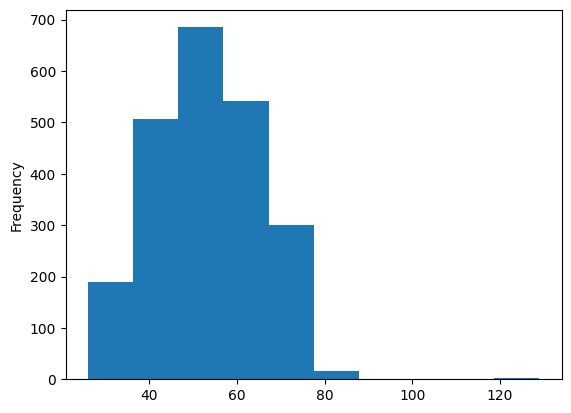

In [41]:
#Histogram for age with matplotlib
df["Age"].plot.hist()

<Axes: xlabel='Age', ylabel='Count'>

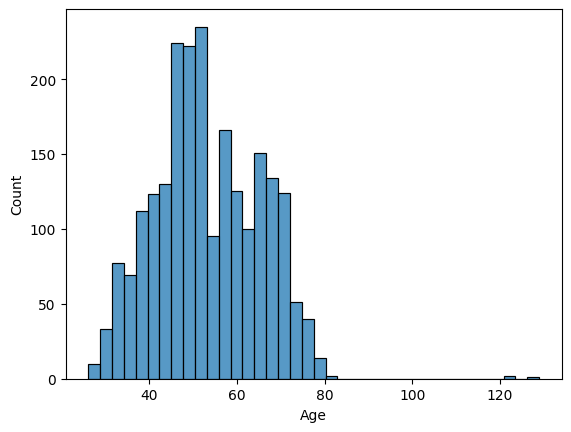

In [42]:
#Histogram for age with seaborn
sns.histplot(data=df, x="Age")

# Excercise 2.2

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.

2. Visualize education levels of the customers.

<Axes: xlabel='Education'>

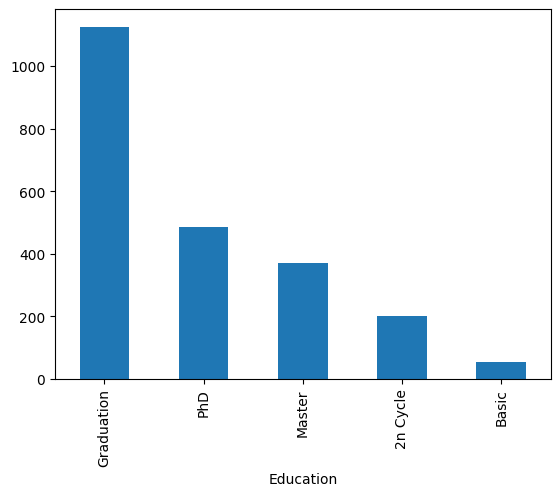

In [43]:
#Bar chart for education levels
df["Education"].value_counts().plot.bar()

<Axes: xlabel='Education', ylabel='count'>

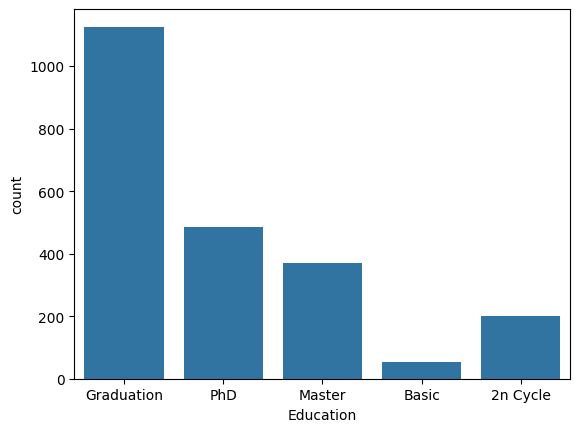

In [44]:
#bar chart with seaborn
sns.countplot(x = "Education", data=df)

# Excercise 2.3

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.

3. Visualize the relation between
    * education level and if someone has complained,
    * age and if someone has complained. 

/var/folders/j9/9v6cy4l50_1dhlx4d1h_hcv80000gn/T/ipykernel_12348/4087575770.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Education", y="Complain", data=df, ci=95)


<Axes: xlabel='Education', ylabel='Complain'>

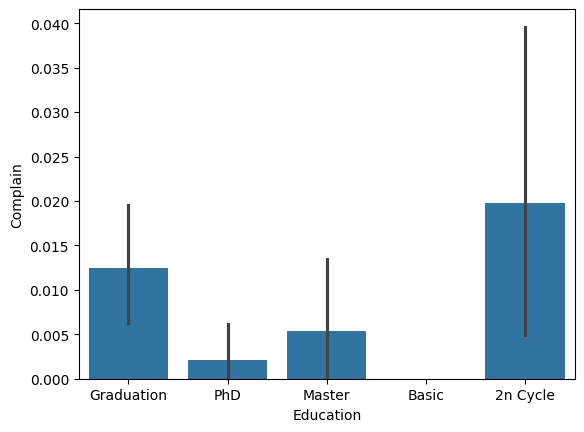

In [45]:
#Bar chart for categorical IV (education) and binary DV (complain)
sns.barplot(x="Education", y="Complain", data=df, ci=95)

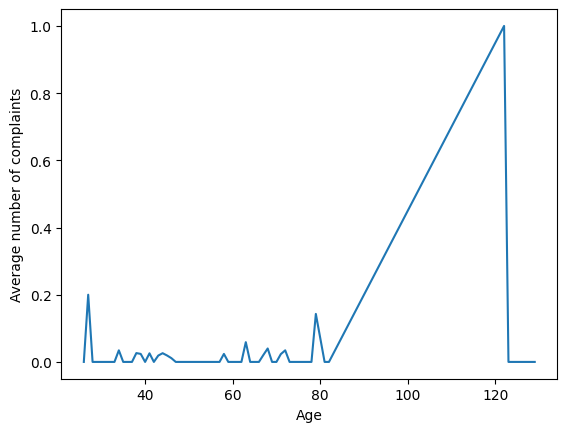

In [56]:
# Plot relationship between age and complains

complaints_age = df.groupby(["Age"])["Complain"].mean()
complaints_age = complaints_age.to_frame()

plt.plot(complaints_age.index, complaints_age["Complain"])
plt.xlabel("Age")
plt.ylabel("Average number of complaints")
plt.show()

# Excercise 2.4

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.

4. Visualize the relation between one's income and number of purchases they have made online and in store. 

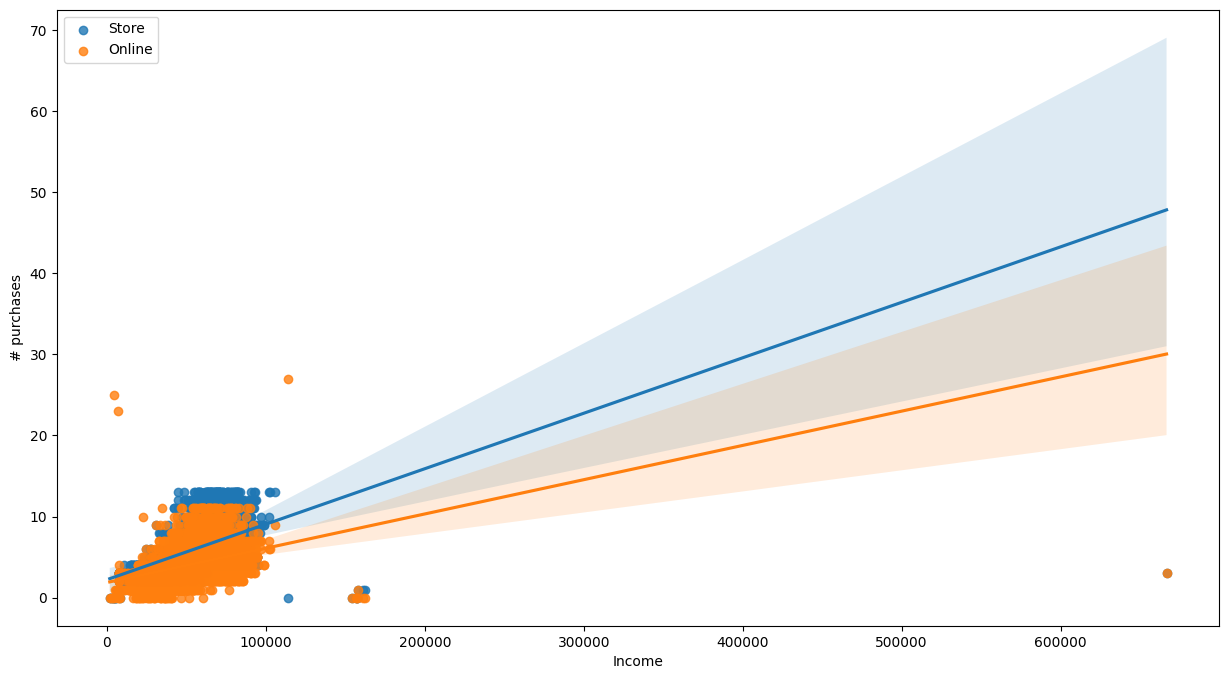

In [48]:
#Regplot for plotting a relation between two continous variables and adding two line to the plot
plt.figure(figsize = (15,8))
ax = sns.regplot(x='Income', y='NumStorePurchases', data=df, label='Store')
ax = sns.regplot(x='Income', y='NumWebPurchases', data=df, label='Online')
ax.set_ylabel("# purchases")
ax.set_xlabel("Income")
ax.legend()